In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import random
import plotly.express as px

## Taller Corte 3  - Visualizacion de datos en Python

## Integrantes:
### Johader Guillermo Cuellar.
### Pryor Jamphier Espinosa.

**Realización de una visualización para la selección de una ruta entre dos ciudades.**


In [2]:
data = 'C:/Users/johad/Desktop/PRUEBAS/bSES/prueba_data_engineer/'


Se evidencia un el dataset tres variables del tráfico entre dos ciudades en Estados Unidos, con una kilometraje del recorrido para llegar a la coudad de destino.   

¿Qué?

La base de datos para el desarrollo del ejerccio contiene variables categoricas de ciudades de los Estados Unidos, que informan una ciudad de origen y una ciudad de destino. Adicionalmente, cuenta con una variable cuantitativa que relaciona o tiene como datos los km recoridos por uno o más pasajeros que viajaron entre esas dos ciudades.

¿Por qué?

Se considera importante realizar los cálculos de la ruta mas rápida entre dos ciudades de los Estados Unidos, con el fin de validar que ciudades que estarán en el camino y programar el recorrido de acuerdo a las gráficas.

¿Como?

Con las variables de Origen y Destino, y agregando la variable de recorrido KM. es obtener la ruta entre dos ciudades y tal vez la mas rapida.

Marcas y Canales.

Las marcas y canales utilizados en la vidualizacion son:

* Marca de área para las variables categóricas y asi ubicar las ciudades en un plano. 
* Canal de espacial horizontal para representar la mejor ruta o la ruta mas corta.
* Marca de linea para realizar la identificacion de que ruta se debe seguir.



## **Observaciones:**

La visualización muestra la ruta mas rapida entre dos puntos o ciudades seleccionadas en Estados Unidos.

Se Visualizan las Rutas de toda la informacion de las ciudades de origen y las de destino así como tambien los kilometros recorridos.

En el grafico de todas las rutas se evidencia mas concentracion de movilización en el centro del gráfico, es decir que existen mas viajes a las ciudades del centro del grafico que a las que se ubican en lo extremos.


In [3]:
dat1 = pd.read_excel(data + 'breweries.xlsx')
dat1

,origin,destinity,km
0,Minneapolis,Pawtucket,422.0
1,Louisville,Mill Valley,459.0
2,Framingham,Ridgefield Park,222.0
3,San Diego,Kearney,573.0
4,San Francisco,Hays,311.0
...,...,...,...
1471,Louisville,Holland,230.0
1472,Framingham,Grand Rapids,581.0
1473,San Diego,Minneapolis,741.0
1474,San Francisco,Minneapolis,559.0


In [4]:
Dis = nx.from_pandas_edgelist(dat1, source='origin', target='destinity', edge_attr='km')

In [5]:
for x in Dis.nodes():
    if Dis.degree(x)<=3:
        print(x)

Pawtucket
Mill Valley
Ridgefield Park
Kearney
Hays
Port Clinton
Gadsden
Idaho Springs
Lewiston
Northamtpon
Westminster
Pittsburgh
York
Utica
Martinsville
Valparaiso
Michigan City
Mishawaka
Bargersville
Seven Points
Chandler
Kansas City
Torrance
Buellton
Dripping Springs
Murphysboro
East Fairfield
Export
Manhattan
Hooksett
Paso Robles
Troutville
Roseville
Lombard
Lemont
St. Paul
Papillion
Portage
St. John's
Worcester
Brooklyn Center
Boynton Beach
Palisade
Abingdon
Erie
St Petersburg
Santee
Mt. Airy
Boone
South Bend
San Luis Obispo
Detroit
Westfield
Madison
Warrenville
Duluth
Monument
Shelbyville
Fuquay-Varina
Lake Barrington
Chico
Houghton
Midvale
Davenport
Kirkwood
Mustang
Kent
East Windsor
Wilkes-Barre
Buena Vista
Conestoga
Dayton
Dunedin
Lahaina
Hershey
Midwest City
Menominee
Manheim
Lowell
Afton
Lone Tree
Crozet
Mt. Pleasant
Pineland
Eagle
Paonia
North Woodstock
Brevard
Vista
Airway Heights
Yardley
Santa Fe
Laurel
Miami
Norfolk
Hudsonville
Conroe
Sacramento
Douglas
Moab
Cheboygan
Ma

In [6]:
Dis.order()

385

In [7]:
Ruta = nx.dijkstra_path(Dis,source='Valparaiso', target='Chandler', weight=True)
Ruta

['Valparaiso', 'Mishawaka', 'Chandler']

In [8]:
Ruta2 = Dis.subgraph(Ruta)

### Ruta mas corta entre Valparaiso y Chandler.

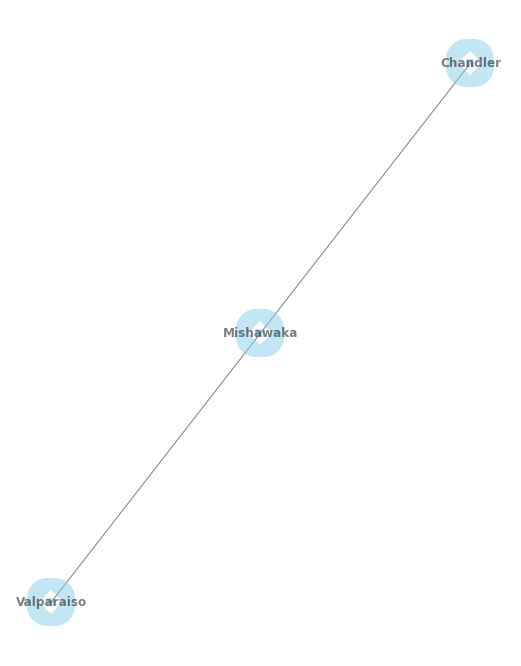

In [53]:
plt.figure(figsize=(20,12))
plt.subplot(121) #subplot(nrows, ncols, plot_number) 
nx.draw(Ruta2, with_labels=True, 
        node_size=50, 
        node_color="skyblue", 
        node_shape="s", 
        alpha=0.5, 
        linewidths=40,
        font_weight='bold')
plt.show()

In [17]:
carac= dat1.set_index('destinity')
carac=dat1.reindex(Dis.nodes())
# Y necesito transformar mi columna categórica en un valor numérico: cat1->1, cat2->2...
carac['destinity']=pd.Categorical(carac['destinity'])
carac['destinity'].cat.codes

Minneapolis       -1
Pawtucket         -1
Louisville        -1
Mill Valley       -1
Framingham        -1
                  ..
Montauk           -1
Ukiah             -1
Garrattsville     -1
South Deerfield   -1
NaN               -1
Length: 385, dtype: int8

## Todas Las Rutas

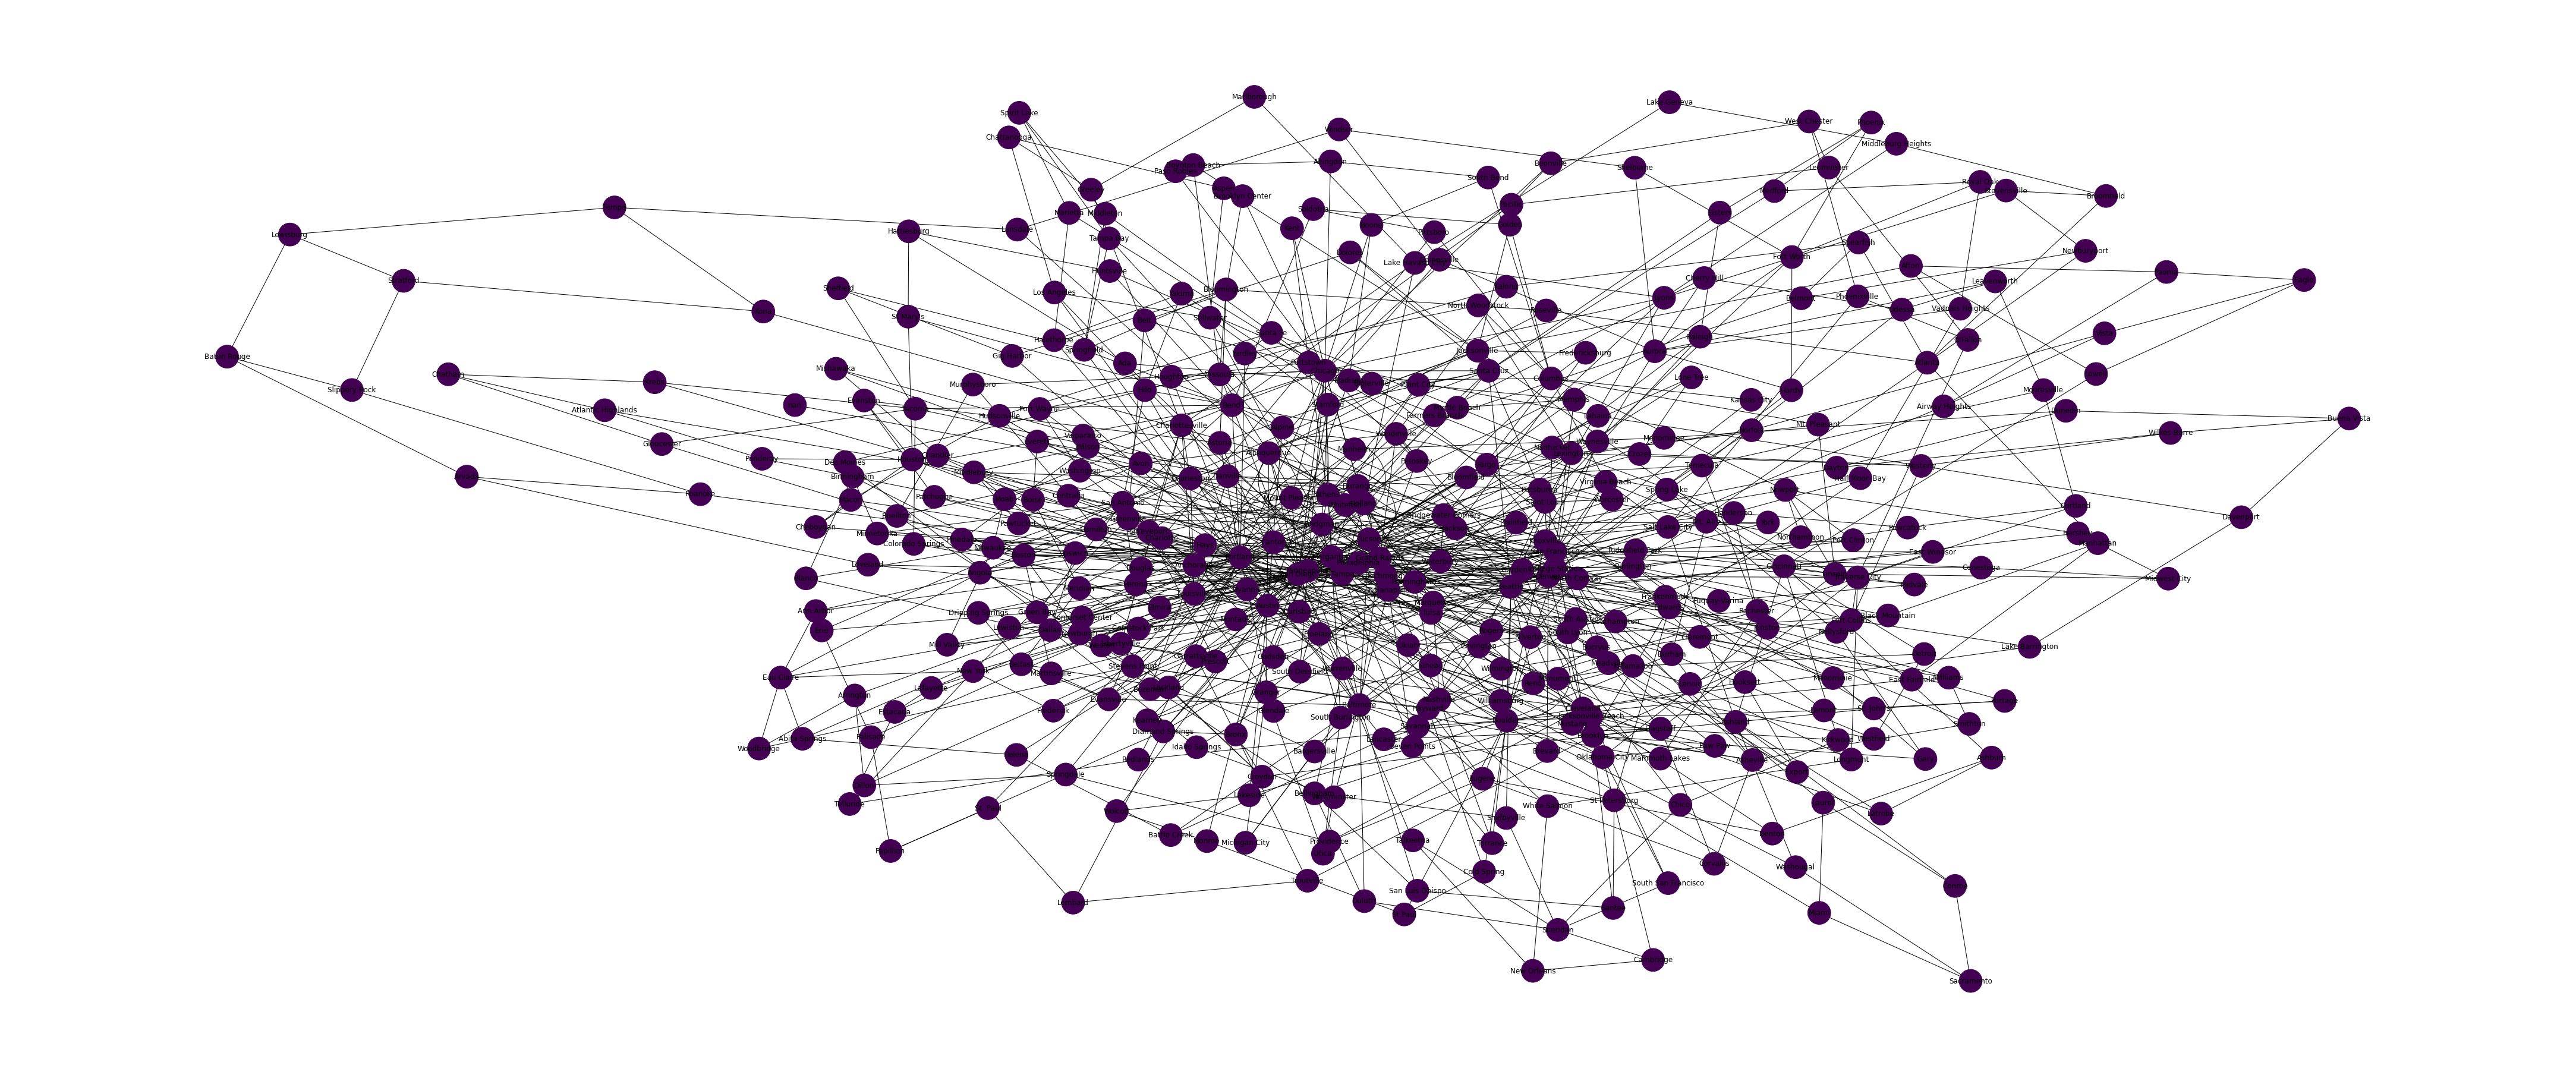

In [18]:
plt.figure(figsize=(60,25))
nx.draw(Dis, with_labels=True, 
        node_color=carac['destinity'].cat.codes, 
        cmap=plt.cm.viridis,
        width=1,
        node_size=1500)

# Seleccion de ruta mas rapida entre Valparaiso y San Diego.

In [41]:
Ruta = nx.dijkstra_path(Dis,source='Valparaiso', target='San Diego', weight=True)
Ryta = Dis.subgraph(Ruta)

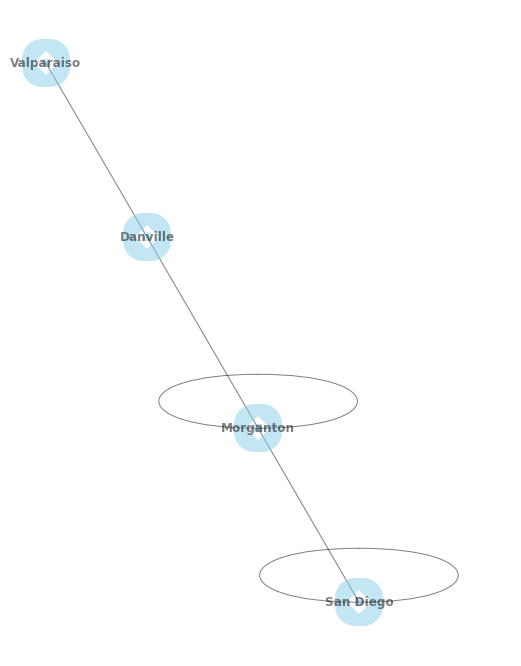

In [50]:
plt.figure(figsize=(20,12))
plt.subplot(121) #subplot(nrows, ncols, plot_number) 
nx.draw(Ryta, with_labels=True, 
        node_size=50, 
        node_color="skyblue", 
        node_shape="s", 
        alpha=0.5, 
        linewidths=40,
        font_weight='bold')
plt.show()